## Construção de um KNN para classificar Handwritten Digit Recognition

### Imports Necessários

In [28]:
from sklearn import datasets, metrics
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


### Carregando o dataset

In [44]:
(X_train, y_train), (X_test, y_test)  = mnist.load_data(path="mnist.npz")


### É necessário que as imagens sejam transformadas em um array de uma dimensão, e não uma matrix 2D

In [39]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))


AttributeError: 'tuple' object has no attribute 'images'

### Separando o dataset nos datasets de treino e de teste

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.3, shuffle=False)


### Definindo o modelo para o teste de cross_validation

In [18]:
knn_cv = KNeighborsClassifier(n_neighbors=3)
cv_scores = cross_val_score(knn_cv, X_train, y_train, cv=5)
print(f'cv_scores mean:{np.mean(cv_scores):.3f}')


cv_scores mean:0.947


In [25]:
score = []
neighbours = []

for k in range(1,25):

    # Instanciate the model
    knn_model = KNeighborsClassifier(n_neighbors = k)

    # Train the model on the scaled Training data
    cv_results = cross_val_score(knn_cv, X_train, y_train, cv=5)

    # Append the score and k
    score.append(cv_results.mean())
    neighbours.append(k)


In [27]:
score


[0.9474925694049201,
 0.9474925694049201,
 0.9474925694049201,
 0.9474925694049201,
 0.9474925694049201,
 0.9474925694049201,
 0.9474925694049201,
 0.9474925694049201,
 0.9474925694049201,
 0.9474925694049201,
 0.9474925694049201,
 0.9474925694049201,
 0.9474925694049201,
 0.9474925694049201,
 0.9474925694049201,
 0.9474925694049201,
 0.9474925694049201,
 0.9474925694049201,
 0.9474925694049201,
 0.9474925694049201,
 0.9474925694049201,
 0.9474925694049201,
 0.9474925694049201,
 0.9474925694049201]

### Treinando o modelo 

In [19]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=3)

In [20]:
predicted_digits = knn.predict(X_test)


In [22]:
print(
    f"Classification report for classifier {knn}:\n"
    f"{metrics.classification_report(y_test, predicted_digits)}\n"
)


Classification report for classifier KNeighborsClassifier(n_neighbors=3):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        53
           1       0.96      1.00      0.98        53
           2       0.98      0.96      0.97        53
           3       0.96      0.92      0.94        53
           4       0.98      0.95      0.96        57
           5       0.95      0.98      0.96        56
           6       0.98      1.00      0.99        54
           7       0.98      1.00      0.99        54
           8       0.96      0.96      0.96        52
           9       0.96      0.95      0.95        55

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540




In [23]:
matriz_confusao = confusion_matrix(y_test, predicted_digits)
print(matriz_confusao)


[[52  0  0  0  1  0  0  0  0  0]
 [ 0 53  0  0  0  0  0  0  0  0]
 [ 1  0 51  1  0  0  0  0  0  0]
 [ 0  0  1 49  0  1  0  1  1  0]
 [ 0  0  0  0 54  0  0  0  1  2]
 [ 0  0  0  0  0 55  1  0  0  0]
 [ 0  0  0  0  0  0 54  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  0]
 [ 0  2  0  0  0  0  0  0 50  0]
 [ 0  0  0  1  0  2  0  0  0 52]]


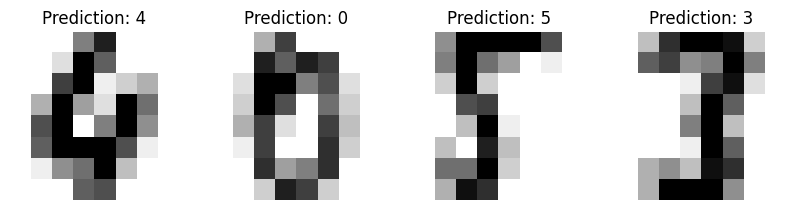

In [24]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted_digits):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")
